In [5]:
## import dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from citipy import citipy
from keys import api_key
from pprint import pprint


In [6]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [7]:
## Create blank Data Frame with city names
city_weather_df = pd.DataFrame({'City':cities})
city_weather_df['Lat'] = ''
city_weather_df['Long'] = ''
city_weather_df['Max Temp'] = ''
city_weather_df['Humidity'] = ''
city_weather_df['Cloudiness'] = ''
city_weather_df['Wind Speed'] = ''
city_weather_df['Country'] = ''
city_weather_df['Date'] = ''


In [8]:
## list to store cities not found
not_cities = []

## define the base url for api request
city_url = 'http://api.openweathermap.org/data/2.5/weather?q='

## for loop to iterate through city names to gather weather data
for index, row in city_weather_df.iterrows():
    city_name = row['City']
    response = requests.get(f'{city_url}{city_name}&appid={api_key}&units=imperial').json()
    
    ## Get weather data from json file and store in Data Frame created above
    try:
        print(f'processing record {index} of {len(cities)} | {city_name}')
        city_weather_df.loc[index, 'Lat'] = response['coord']['lat']
        city_weather_df.loc[index, 'Long'] = response['coord']['lon']
        city_weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        city_weather_df.loc[index, 'Country'] = response['sys']['country']
        city_weather_df.loc[index, 'Date'] = response['dt']
        
    
    ## If there is no weather data for the city, print message and add to list of not_cities
    except KeyError:
        print(f'{city_name} not found...skipping')
        not_cities.append(city_name)


processing record 0 of 598 | dingle
processing record 1 of 598 | busselton
processing record 2 of 598 | guerrero negro
processing record 3 of 598 | bluff
processing record 4 of 598 | bredasdorp
processing record 5 of 598 | lolua
lolua not found...skipping
processing record 6 of 598 | keuruu
processing record 7 of 598 | kangaba
processing record 8 of 598 | ostrovnoy
processing record 9 of 598 | carnarvon
processing record 10 of 598 | asfi
processing record 11 of 598 | cabo san lucas
processing record 12 of 598 | punta arenas
processing record 13 of 598 | shubarkuduk
processing record 14 of 598 | kodiak
processing record 15 of 598 | belushya guba
belushya guba not found...skipping
processing record 16 of 598 | barentsburg
barentsburg not found...skipping
processing record 17 of 598 | miri
processing record 18 of 598 | vaini
processing record 19 of 598 | tautira
processing record 20 of 598 | port elizabeth
processing record 21 of 598 | ushuaia
processing record 22 of 598 | hobart
processi

processing record 192 of 598 | richards bay
processing record 193 of 598 | taoudenni
processing record 194 of 598 | manokwari
processing record 195 of 598 | narsaq
processing record 196 of 598 | basoda
processing record 197 of 598 | nanortalik
processing record 198 of 598 | sonoita
processing record 199 of 598 | nikolsk
processing record 200 of 598 | macae
processing record 201 of 598 | gat
processing record 202 of 598 | camacha
processing record 203 of 598 | bethel
processing record 204 of 598 | torata
processing record 205 of 598 | vilcun
processing record 206 of 598 | storm lake
processing record 207 of 598 | aquiraz
processing record 208 of 598 | tasiilaq
processing record 209 of 598 | felidhoo
felidhoo not found...skipping
processing record 210 of 598 | phuket
processing record 211 of 598 | mashhad
processing record 212 of 598 | teguldet
processing record 213 of 598 | douentza
processing record 214 of 598 | attawapiskat
attawapiskat not found...skipping
processing record 215 of 59

processing record 382 of 598 | curup
processing record 383 of 598 | arrifes
processing record 384 of 598 | sulangan
processing record 385 of 598 | takoradi
processing record 386 of 598 | san patricio
processing record 387 of 598 | bur gabo
bur gabo not found...skipping
processing record 388 of 598 | kaitangata
processing record 389 of 598 | pangody
processing record 390 of 598 | fortuna
processing record 391 of 598 | lata
processing record 392 of 598 | bud
processing record 393 of 598 | whitehorse
processing record 394 of 598 | kirkwall
processing record 395 of 598 | odienne
processing record 396 of 598 | juneau
processing record 397 of 598 | katobu
processing record 398 of 598 | thunder bay
processing record 399 of 598 | doctor pedro p. pena
doctor pedro p. pena not found...skipping
processing record 400 of 598 | kathu
processing record 401 of 598 | nelson bay
processing record 402 of 598 | valsamata
processing record 403 of 598 | kununurra
processing record 404 of 598 | sombreffe
pro

processing record 575 of 598 | puerto escondido
processing record 576 of 598 | tikapur
processing record 577 of 598 | weligama
processing record 578 of 598 | caucaia
processing record 579 of 598 | guilin
processing record 580 of 598 | breves
processing record 581 of 598 | itacare
processing record 582 of 598 | bureya
processing record 583 of 598 | hvolsvollur
processing record 584 of 598 | burgeo
processing record 585 of 598 | houston
processing record 586 of 598 | saint-pierre
processing record 587 of 598 | corat
processing record 588 of 598 | qaqortoq
processing record 589 of 598 | le portel
processing record 590 of 598 | jumla
processing record 591 of 598 | maningrida
processing record 592 of 598 | salamiyah
processing record 593 of 598 | hambantota
processing record 594 of 598 | samur
processing record 595 of 598 | quelimane
processing record 596 of 598 | afikpo
processing record 597 of 598 | college


In [9]:
## Clean up data from json and store in new variable - clean_weather_df
clean_weather_df = city_weather_df.replace(r'^\s*$', np.nan, regex=True)
clean_weather_df = clean_weather_df.dropna(axis=0,how='any')
clean_weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingle,10.9995,122.6711,81.64,83.0,91.0,6.33,PH,1.615609e+09
1,busselton,-33.6500,115.3333,70.00,49.0,0.0,3.00,AU,1.615609e+09
2,guerrero negro,27.9769,-114.0611,55.56,64.0,0.0,12.77,MX,1.615609e+09
3,bluff,-46.6000,168.3333,64.99,71.0,0.0,5.99,NZ,1.615609e+09
4,bredasdorp,-34.5322,20.0403,51.80,93.0,45.0,1.14,ZA,1.615609e+09


In [10]:
## Export data to csv file
clean_weather_df.to_csv('../Output/weather_data.csv',index=False)

In [11]:
## display summary statistics for clean_weather_df
clean_weather_df.describe(include=[np.number])

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,19.527006,17.588099,54.782637,71.857143,52.780220,8.830440,1.615609e+09
std,32.830223,88.719582,27.099415,20.305504,39.042382,6.420643,8.478202e+01
min,-54.800000,-175.200000,-20.200000,11.000000,0.000000,0.540000,1.615609e+09
25%,-7.453425,-58.715150,37.412500,62.000000,6.250000,3.985000,1.615609e+09
50%,22.281200,20.785700,60.800000,75.000000,63.000000,6.890000,1.615609e+09
75%,48.204125,95.179200,77.000000,88.000000,90.000000,12.395000,1.615609e+09
max,78.218600,179.316700,96.840000,100.000000,100.000000,37.870000,1.615609e+09


In [12]:
## seperate humid cities from ideal cities and display summary statistics for humid cities
humid_city_df = clean_weather_df.loc[clean_weather_df['Humidity']>=100]
ideal_city_df = clean_weather_df.loc[clean_weather_df['Humidity']<100]
humid_city_df.describe(include=[np.number])

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000e+00
mean,14.417222,-35.800500,54.446667,100.0,53.777778,6.915556,1.615609e+09
std,33.851398,61.921604,16.008141,0.0,37.234990,7.215161,3.608478e+01
min,-38.650000,-130.320100,35.010000,100.0,0.000000,1.990000,1.615609e+09
25%,-5.134700,-72.233300,41.000000,100.0,18.000000,3.440000,1.615609e+09
50%,10.160300,-49.326700,51.010000,100.0,75.000000,4.610000,1.615609e+09
75%,36.297000,22.301000,68.000000,100.0,75.000000,6.910000,1.615609e+09
max,60.306700,59.606200,75.200000,100.0,90.000000,25.320000,1.615609e+09


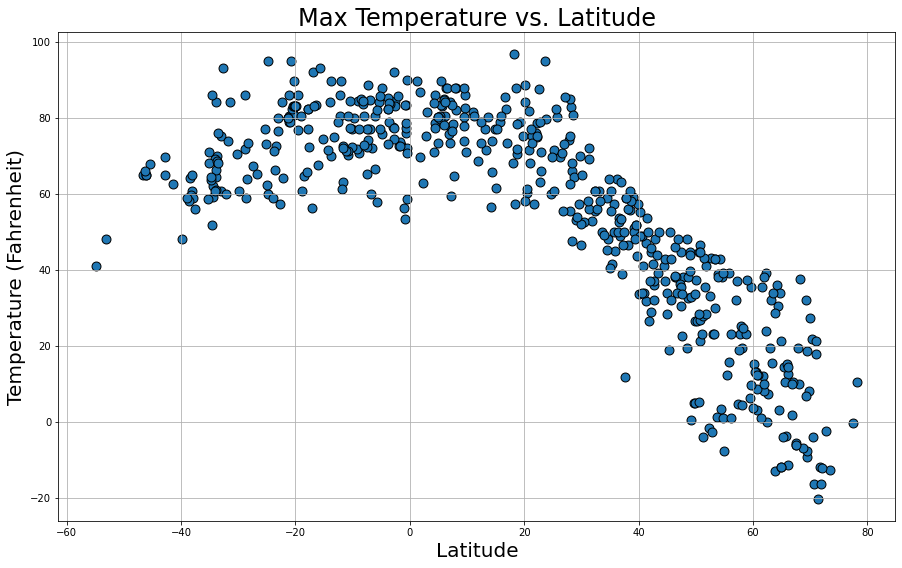

In [13]:
## Temperature (F) vs. Latitude
temp = ideal_city_df['Max Temp']
lat = ideal_city_df['Lat']

## Plot data
plt.figure(figsize=(15,9))
plt.scatter(lat,temp,s=80,edgecolors='black')
plt.title('Max Temperature vs. Latitude',fontsize = 24)
plt.ylabel('Temperature (Fahrenheit)',fontsize = 20)
plt.xlabel('Latitude',fontsize=20)
plt.grid(which='major')


plt.show()



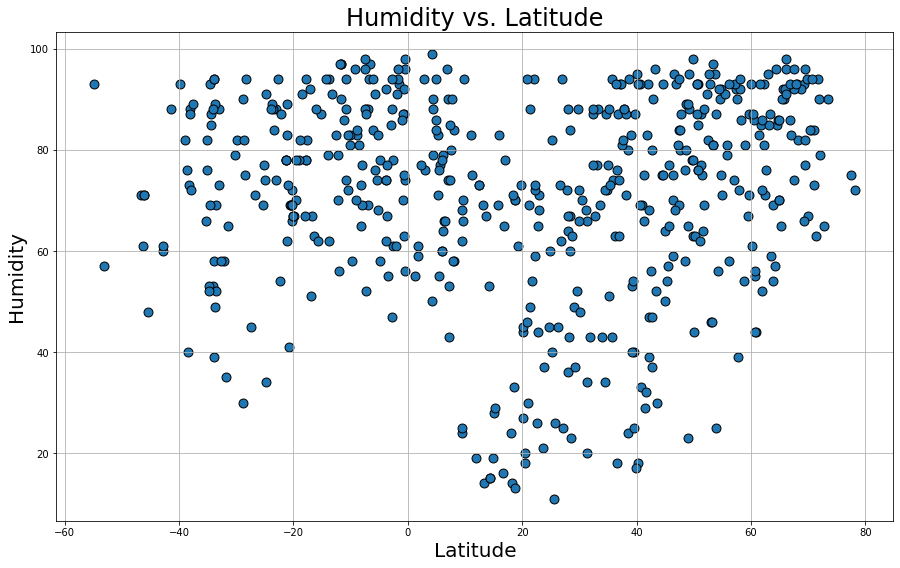

In [14]:
## Humidity (%) vs. Latitude

hum = ideal_city_df['Humidity']
lat = ideal_city_df['Lat']

## plot data
plt.figure(figsize=(15,9))
plt.scatter(lat, hum,s=80,edgecolors='black')
plt.title('Humidity vs. Latitude',fontsize = 24)
plt.ylabel('Humidity',fontsize = 20)
plt.xlabel('Latitude',fontsize=20)
plt.grid(which='major')

plt.show()

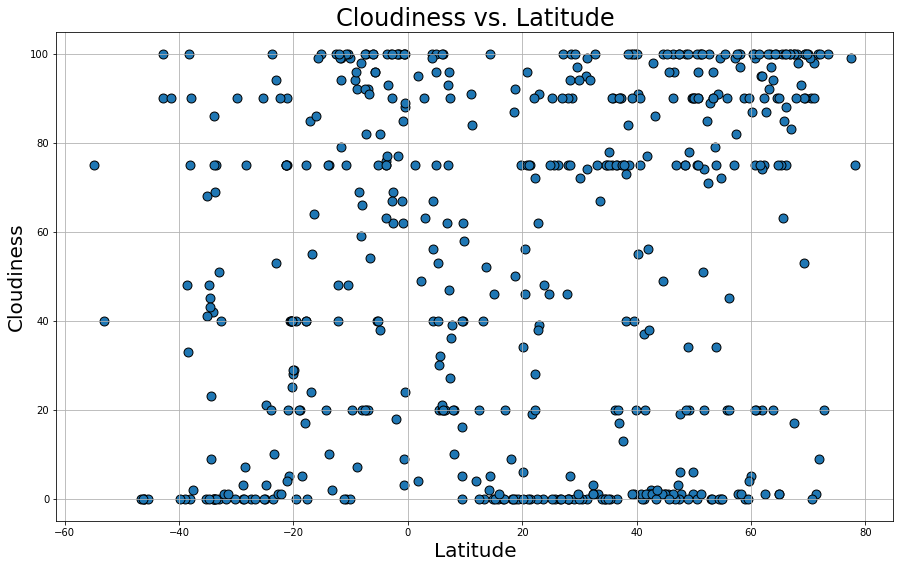

In [15]:
## Cloudiness (%) vs. Latitude

cloud = ideal_city_df['Cloudiness']
lat = ideal_city_df['Lat']

## plot data
plt.figure(figsize=(15,9))
plt.scatter(lat,cloud,s=80,edgecolors='black')
plt.title('Cloudiness vs. Latitude',fontsize = 24)
plt.ylabel('Cloudiness',fontsize = 20)
plt.xlabel('Latitude',fontsize=20)
plt.grid(which='major')

plt.show()

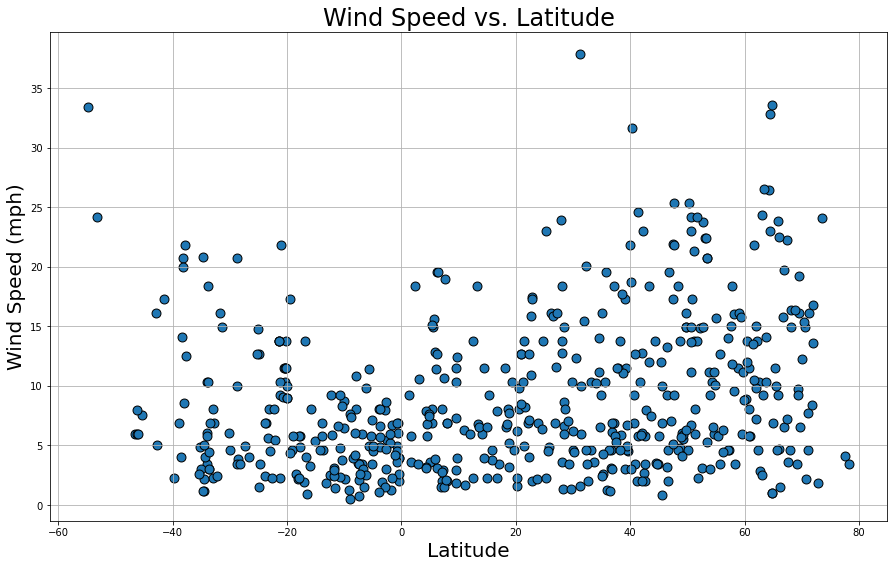

In [16]:
## Wind Speed (mph) vs. Latitude

wind = ideal_city_df['Wind Speed']
lat = ideal_city_df['Lat']

## plot data
plt.figure(figsize=(15,9))
plt.scatter(lat,wind,s=80,edgecolors='black')
plt.title('Wind Speed vs. Latitude',fontsize = 24)
plt.ylabel('Wind Speed (mph)',fontsize = 20)
plt.xlabel('Latitude',fontsize=20)
plt.grid(which='major')

plt.show()

In [17]:
## Seperate cities into new data frames for nothern and southern hemispheres
northern_hem = clean_weather_df.loc[clean_weather_df['Lat']>=0]
southern_hem = clean_weather_df.loc[clean_weather_df['Lat']<0]

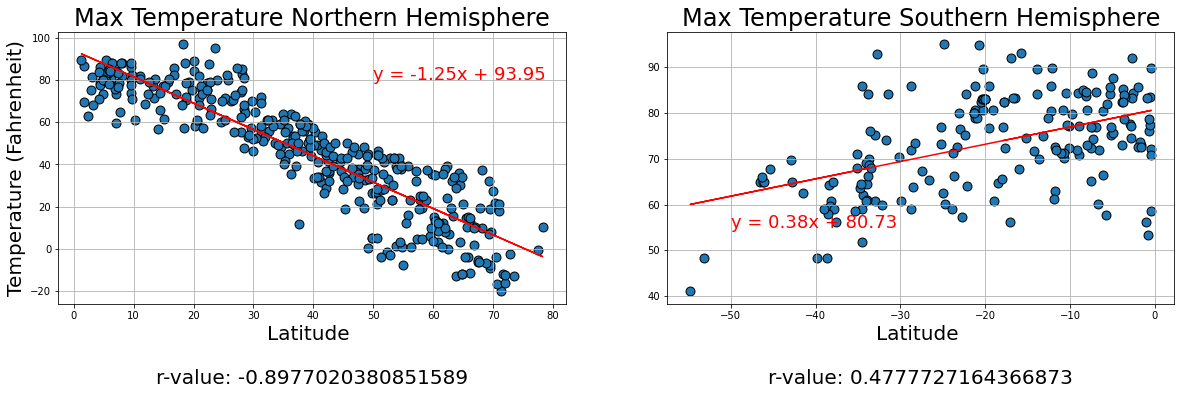

In [18]:
## Hemisphere Temperature (F) vs. Latitude

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))


## Northern Hemisphere - Temperature (F) vs. Latitude
## variables
north_temp = northern_hem['Max Temp']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, nrvalue, pvalue, stderr) = st.linregress(north_lat, north_temp)
temp1_regress_values = (slope * north_lat) + intercept
ntemp_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on left subplot
ax1.scatter(north_lat,north_temp,s=80,edgecolors='black')
ax1.plot(north_lat,temp1_regress_values,color='red')
ax1.annotate(ntemp_line_eq,(50,80),fontsize=18,color="red")
ax1.set_title('Max Temperature Northern Hemisphere',fontsize = 24)
ax1.set_ylabel('Temperature (Fahrenheit)',fontsize = 20)
ax1.set_xlabel(f'Latitude \n\nr-value: {nrvalue}',fontsize=20)
ax1.grid(which='major')


## Southern Hemisphere - Temperature (F) vs. Latitude
## variables
south_temp = southern_hem['Max Temp']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, srvalue, pvalue, stderr) = st.linregress(south_lat, south_temp)
temp2_regress_values = (slope * south_lat) + intercept
stemp_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on right subplot
ax2.scatter(south_lat,south_temp,s=80,edgecolors='black')
ax2.plot(south_lat,temp2_regress_values,color='red')
ax2.annotate(stemp_line_eq,(-50,55),fontsize=18,color="red")
ax2.set_title('Max Temperature Southern Hemisphere',fontsize = 24)
ax2.set_xlabel(f'Latitude \n\nr-value: {srvalue}',fontsize=20)
ax2.grid(which='major')

## Print correlation coefficient


plt.show()

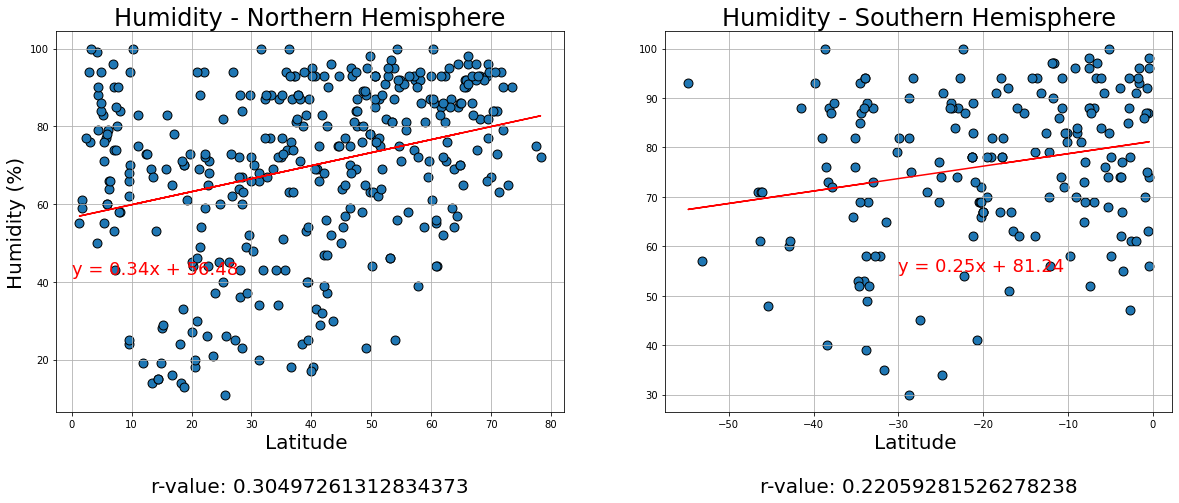

In [19]:
## Northern Hemisphere - Humidity (%) vs. Latitude

## Define Figure 2
fig2, (ax1,ax2) = plt.subplots(1,2,figsize=(20,7))

## variables
north_hum = northern_hem['Humidity']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, nrvalue, pvalue, stderr) = st.linregress(north_lat, north_hum)
hum1_regress_values = (slope * north_lat) + intercept
nhum_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on left subplot
ax1.scatter(north_lat,north_hum,s=80,edgecolors='black')
ax1.plot(north_lat,hum1_regress_values,color='red')
ax1.annotate(nhum_line_eq,(0,42),fontsize=18,color="red")
ax1.set_title('Humidity - Northern Hemisphere',fontsize = 24)
ax1.set_ylabel('Humidity (%)',fontsize = 20)
ax1.set_xlabel(f'Latitude \n\nr-value: {nrvalue}',fontsize=20)
ax1.grid(which='major')

## Southern Hemisphere - Humidity (%) vs. Latitude
## variables
south_hum = southern_hem['Humidity']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, srvalue, pvalue, stderr) = st.linregress(south_lat, south_hum)
hum2_regress_values = (slope * south_lat) + intercept
shum_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on right subplot
ax2.scatter(south_lat,south_hum,s=80,edgecolors='black')
ax2.plot(south_lat,hum2_regress_values,color='red')
ax2.annotate(shum_line_eq,(-30,55),fontsize=18,color="red")
ax2.set_title('Humidity - Southern Hemisphere',fontsize = 24)
ax2.set_xlabel(f'Latitude \n\nr-value: {srvalue}',fontsize=20)
ax2.grid(which='major')

plt.show()


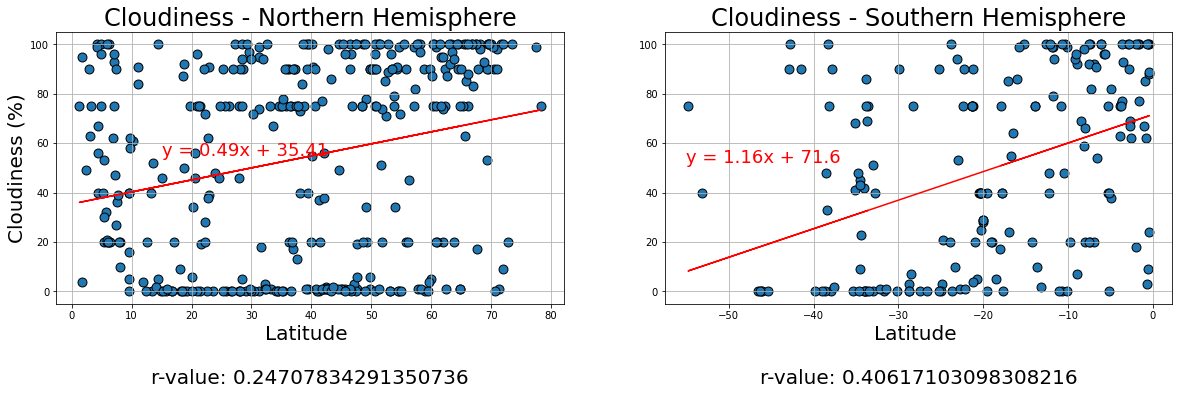

In [20]:
## Northern Hemisphere - Cloudiness (%) vs. Latitude

## Define Figure for subplots
fig3, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

## variables
north_cloud = northern_hem['Cloudiness']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, nrvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
cloud1_regress_values = (slope * north_lat) + intercept
ncloud_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on left subplot
ax1.scatter(north_lat,north_cloud,s=80,edgecolors='black')
ax1.plot(north_lat,cloud1_regress_values,color='red')
ax1.annotate(ncloud_line_eq,(15,55),fontsize=18,color="red")
ax1.set_title('Cloudiness - Northern Hemisphere',fontsize = 24)
ax1.set_ylabel('Cloudiness (%)',fontsize = 20)
ax1.set_xlabel(f'Latitude \n\nr-value: {nrvalue}',fontsize=20)
ax1.grid(which='major')

## Southern Hemisphere - Cloudiness (%) vs. Latitude
## variables
south_cloud = southern_hem['Cloudiness']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, srvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
cloud2_regress_values = (slope * south_lat) + intercept
scloud_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on right subplot
ax2.scatter(south_lat,south_cloud,s=80,edgecolors='black')
ax2.plot(south_lat,cloud2_regress_values,color='red')
ax2.annotate(scloud_line_eq,(-55,52),fontsize=18,color="red")
ax2.set_title('Cloudiness - Southern Hemisphere',fontsize = 24)
ax2.set_xlabel(f'Latitude \n\nr-value: {srvalue}',fontsize=20)
ax2.grid(which='major')

plt.show()



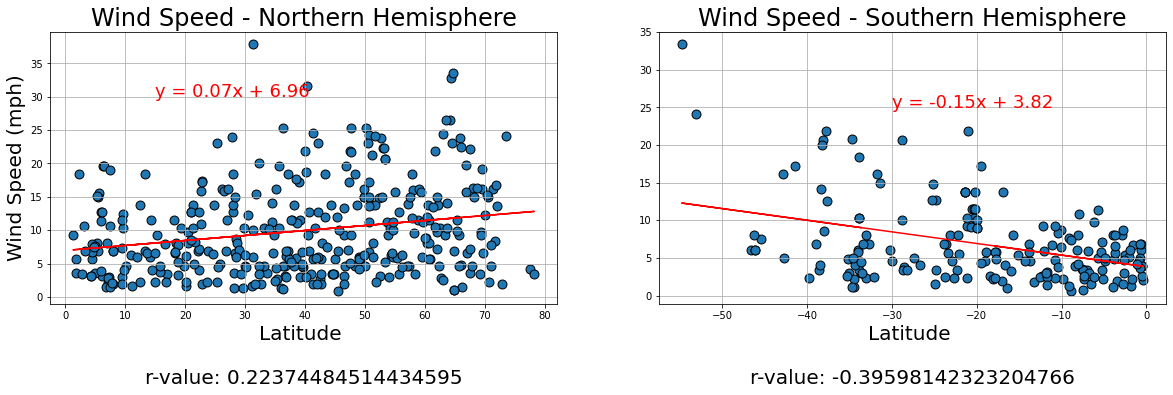

In [21]:
## Northern Hemisphere - Wind Speed (mph) vs. Latitude

## Define Figure 4 for subplots
fig4, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

## variables
north_wind = northern_hem['Wind Speed']
north_lat = northern_hem['Lat']

## Linear Regression
(slope, intercept, nrvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
wind1_regress_values = (slope * north_lat) + intercept
nwind_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on left subplot
ax1.scatter(north_lat,north_wind,s=80,edgecolors='black')
ax1.plot(north_lat,wind1_regress_values,color='red')
ax1.annotate(nwind_line_eq,(15,30),fontsize=18,color="red")
ax1.set_title('Wind Speed - Northern Hemisphere',fontsize = 24)
ax1.set_ylabel('Wind Speed (mph)',fontsize = 20)
ax1.set_xlabel(f'Latitude \n\nr-value: {nrvalue}',fontsize=20)
ax1.grid(which='major')

## Southern Hemisphere - Wind Speed (mph) vs. Latitude
## variables
south_wind = southern_hem['Wind Speed']
south_lat = southern_hem['Lat']

## Linear Regression
(slope, intercept, srvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
wind2_regress_values = (slope * south_lat) + intercept
swind_line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

## Plot Data on right subplot
ax2.scatter(south_lat,south_wind,s=80,edgecolors='black')
ax2.plot(south_lat,wind2_regress_values,color='red')
ax2.annotate(swind_line_eq,(-30,25),fontsize=18,color="red")
ax2.set_title('Wind Speed - Southern Hemisphere',fontsize = 24)
ax2.set_xlabel(f'Latitude \n\nr-value: {srvalue}',fontsize=20)
ax2.grid(which='major')

plt.show()

